In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the file and name the column


In [75]:
df = pd.read_csv('Lyrics Cleaned.csv')
df

,Songs,Lyrics
0,Need Another Drink,Hybrid When It's Hot You need another drink ...
1,Detroit State Of Mind Pt. 2,"Roaches crawlin' up the wall, piss-stained be..."
2,Pac Blood,"The Shakespeare of 16's, dipping my ink pen M..."
3,Kush Coma,"Close my eyes, feel like I'm going down In an ..."
4,Best Life,"La la la la la, la la la La la la la la, la la..."
...,...,...
106,Die Like A Rockstar,Brown bless the mic like gesundheit Bud bout ...
107,Bag Back,I lived my whole life for a green piece of pap...
108,Change Up,"They thought I was gone, back from the grave M..."
109,Dope Fiend Rental,Trail of blood on that baggie I done scraped m...


# Count Words, lexical density, etc

The lines below show You two ways of measuring the lyrical density of an artist. 
 - The first is using a lambda expression and a sum() method to calculate the words, and uniq words in each song
 - Then I sum these two columns, and divide total_uniq with total_words 


The other method is using NLTK which seems more accurate, as the percentage is close to the result from https://pudding.cool/projects/vocabulary/index.html


In [35]:
df['characters'] = df.Lyrics.str.len()
df['words'] = df.Lyrics.str.split().str.len()
df['lines'] = df.Lyrics.str.split('\n').str.len()
df['uniq_words'] = df.Lyrics.apply(lambda x: len(set(x.split())))
df['lexical_density'] = df['uniq_words'] / df['words']

df.head()

,Songs,Lyrics,characters,words,lines,uniq_words,lexical_density
0,Need Another Drink,Hybrid When It's Hot You need another drink ...,1723,350,1,189,0.540000
1,Detroit State Of Mind Pt. 2,"Roaches crawlin' up the wall, piss-stained be...",2180,407,1,246,0.604423
2,Pac Blood,"The Shakespeare of 16's, dipping my ink pen M...",1701,308,1,219,0.711039
3,Kush Coma,"Close my eyes, feel like I'm going down In an ...",3856,799,1,335,0.419274
4,Best Life,"La la la la la, la la la La la la la la, la la...",2088,449,1,192,0.427617


In [36]:
df['words'].sum()

43980

In [37]:
def total_density():
    total_words = df['words'].sum()
    total_uniq = df['uniq_words'].sum()
    return total_uniq / total_words

In [38]:
total_words = df['words'].sum()
total_uniq = df['uniq_words'].sum()
total_uniq

24277

In [39]:
total_density()

0.5520009095043201

# Calculate vocabulary with NLTK

Here I'm using the methods described at http://www.nltk.org/book/ch01.html

 - First I export the DF to a TXT format
 - Then I import NLTK and word_tokenize
 - With len(set()) and len() I calculate the number of uniq words and the total words
 - After that I write a function which calculates the density of the vocabulary.
 
My density is 13% using 49000 total words and puctuations, the pudding.cool study used 35000 words and got 12% for Danny Brown

In [40]:
text = df.Lyrics.to_csv(sep=' ', index=False, header=False)

In [41]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Matyas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Matyas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
tokenized = word_tokenize(text)

In [43]:
len(set(tokenized))

6697

In [44]:
len(tokenized)

49851

In [45]:
def lexical_richness(text):
    return len(set(text)) / len(text)

In [46]:
lexical_richness(tokenized)

0.1343403341959038

# Create Graphs Based on the DataFrame

Most Songs are between 250 and 500 words, and most songs have a vocabulary betweeb 200 and 300  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D44F9E888>,
      dtype=object)

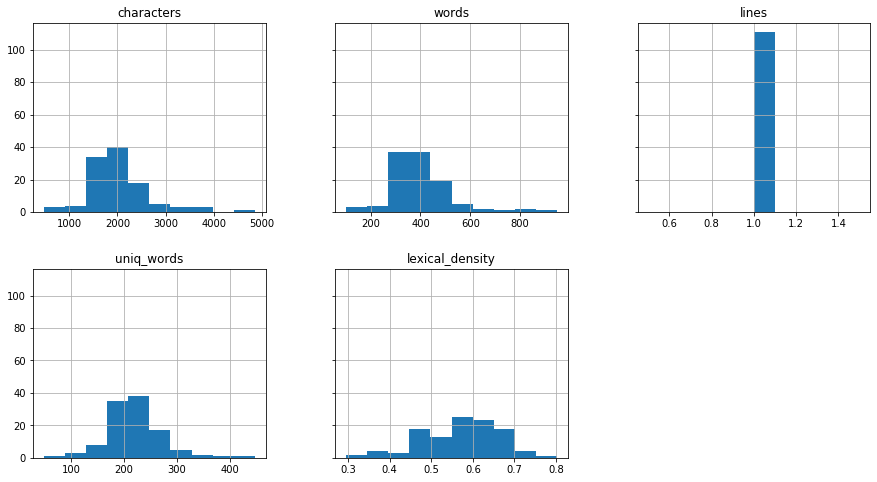

In [47]:
df.hist(sharey=True, layout=(2, 3), figsize=(15, 8))

# Common Long Words and Tri-grams

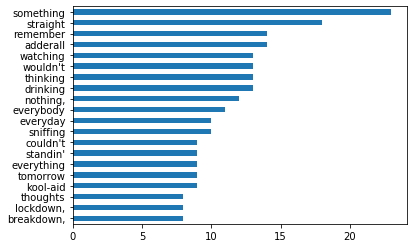

In [48]:
pd.Series([w for w in ' '.join(df.Lyrics).lower().split() if len(w) > 7]).value_counts()[:20][::-1].plot(kind='barh')

In [49]:
from nltk import ngrams


def get_ngrams_from_series(series, n=2):
    # using nltk.ngrams
    lines = ' '.join(series).lower().split('\n')
    lgrams = [ngrams(l.split(), n) for l in lines]
    grams = [[' '.join(g) for g in list(lg)] for lg in lgrams]
    return [item for sublist in grams for item in sublist]



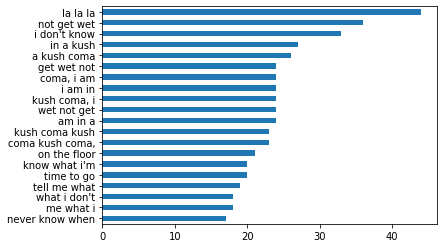

In [50]:
pd.Series(get_ngrams_from_series(df.Lyrics, 3)).value_counts()[:20][::-1].plot(kind='barh')

# Sentiment Analysis

In [51]:
import nltk
from nltk import sentiment
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Matyas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Sentiment Analysis can determine whether a piece of text has a negative, positive, or a neutral sentiment. In this case I want to use it to figure out how Brown's sentiment shifted on his last 3 albums

In [52]:

senti_analyze = sentiment.vader.SentimentIntensityAnalyzer()

df['sentiment_rating'] = pd.DataFrame(df.Lyrics.apply(senti_analyze.polarity_scores).tolist())['compound']
df['sentiment'] = pd.cut(df['sentiment_rating'], [-np.inf, -0.35, 0.35, np.inf], labels=['negative', 'neutral', 'positive'])

df.head()

,Songs,Lyrics,characters,words,lines,uniq_words,lexical_density,sentiment_rating,sentiment
0,Need Another Drink,Hybrid When It's Hot You need another drink ...,1723,350,1,189,0.540000,-0.9564,negative
1,Detroit State Of Mind Pt. 2,"Roaches crawlin' up the wall, piss-stained be...",2180,407,1,246,0.604423,-0.9971,negative
2,Pac Blood,"The Shakespeare of 16's, dipping my ink pen M...",1701,308,1,219,0.711039,-0.9717,negative
3,Kush Coma,"Close my eyes, feel like I'm going down In an ...",3856,799,1,335,0.419274,-0.9932,negative
4,Best Life,"La la la la la, la la la La la la la la, la la...",2088,449,1,192,0.427617,0.9941,positive


# Does Sentiment score correlate with other metrics?

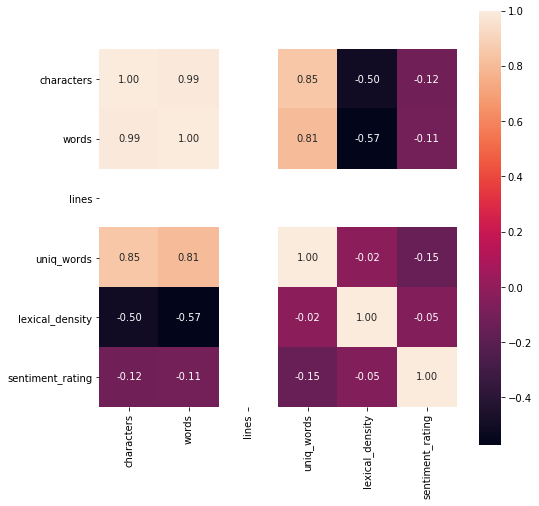

In [53]:
corr = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.2f', square=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)



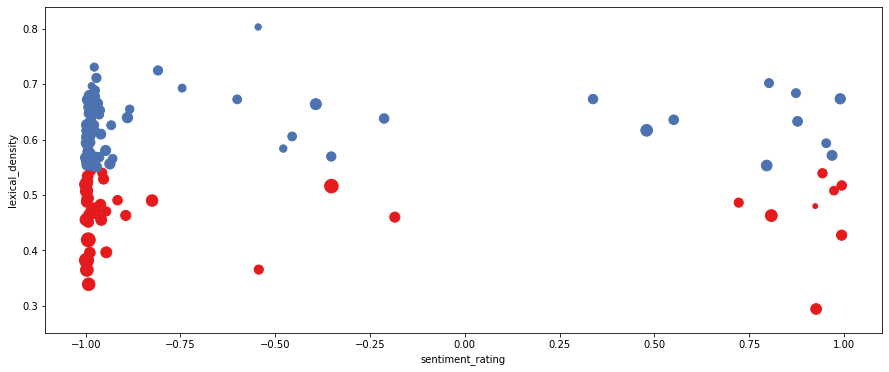

In [54]:
df.plot.scatter(x='sentiment_rating', y='lexical_density', s=df['characters']/20,
                c=np.where(df['lexical_density'].le(0.55), '#e41a1c', '#4c72b0'),
                figsize=(15, 6))

Songs with lower sentiment rating tend to have higher lexical density

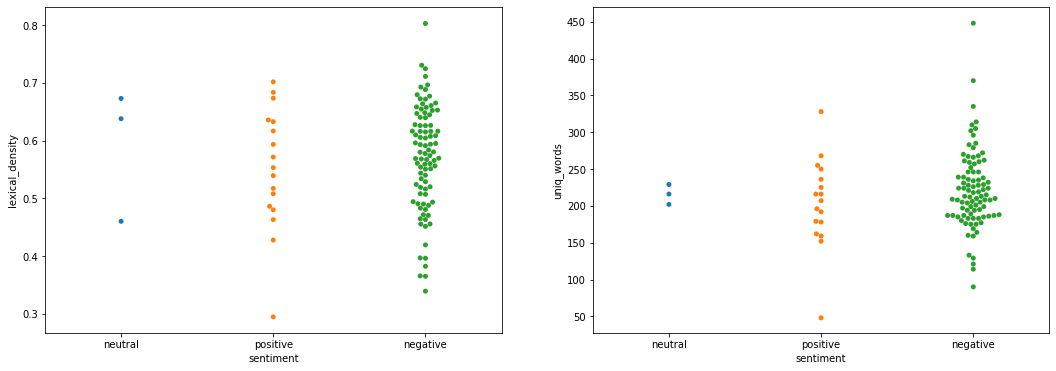

In [55]:
cols_metrics = ['lexical_density', 'uniq_words']
fig, axs = plt.subplots(figsize=(18, 6), ncols=len(cols_metrics))
for i, c in enumerate(cols_metrics):
    sns.swarmplot(x='sentiment', y=c, data=df, ax=axs[i], order=['neutral', 'positive', 'negative'])

Negative songs get a high lexical density but they have a larger spread.
Negative songs have higher uniq words 

# Markov Chain song generator

In [56]:
import re
import random
from collections import defaultdict


class MarkovRachaita:
    def __init__(self, corpus='', order=2, length=8):
        self.order = order
        self.length = length
        self.words = re.findall("[a-z']+", corpus.lower())
        self.states = defaultdict(list)

        for i in range(len(self.words) - self.order):
            self.states[tuple(self.words[i:i + self.order])].append(self.words[i + order])

    def gen_sentence(self, length=8, startswith=None):
        terms = None
        if startswith:
            start_seed = [x for x in self.states.keys() if startswith in x]
            if start_seed:
                terms = list(start_seed[0])
        if terms is None:
            start_seed = random.randint(0, len(self.words) - self.order)
            terms = self.words[start_seed:start_seed + self.order]

        for _ in range(length):
            terms.append(random.choice(self.states[tuple(terms[-self.order:])]))

        return ' '.join(terms)

    def gen_song(self, lines=10, length=8, length_range=None, startswith=None):
        song = []
        if startswith:
            song.append(self.gen_sentence(length=length, startswith=startswith))
            lines -= 1
        for _ in range(lines):
            sent_len = random.randint(*length_range) if length_range else length
            song.append(self.gen_sentence(length=sent_len))
        return '\n'.join(song)

In [57]:
dannyai = MarkovRachaita(corpus=' '.join(df.Lyrics))
dannyai.gen_song(lines=10, length_range=[6, 10])

"know what i'm sayin' like bad luck never give in naw\nheard a knock i know a whole lot\nkush coma i am gon' fuck her tonight\nso be cool nigga sit back relax don't\nto a wino i see you're kinda slow\ndo it like a georgetown hoya when i say you never get\nyou so bold if you fuck with no\nshit now we up in that soda tell your special kids stop\nwhile you follow these steps and my real\nwatch yo' kids ya bitch mouth and my"

# Text Classification 

In [58]:
# Import stopwords and punkt

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Remove stopwords from text

stopwords = set(stopwords.words("english"))
all_words =[]
raw = text
tokens = nltk.word_tokenize(raw)
texts = word_tokenize(raw)
for w in texts:
    if w not in stopwords:
        all_words.append(w)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Matyas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Matyas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The Below code classifies the parts of speech in the updated list.
Then it assigns it to a dataframe

In [59]:
tagged = nltk.pos_tag(all_words)
print(all_words)

['``', 'Hybrid', 'When', 'It', "'s", 'Hot', 'You', 'need', 'another', 'drink', 'What', 'cha', "'", 'think', 'A', 'nigga', 'gon', 'na', 'Go', 'outside', 'Smoke', 'blunt', 'car', 'come', 'back', 'And', 'get', 'love', 'club', 'I', 'see', 'lot', 'hoes', 'They', 'dick', 'Bunch', 'player', 'haters', 'want', 'front', 'bitch', 'If', 'bitch', 'want', 'fuck', 'Then', 'let', 'thing', 'Just', 'step', 'fuck', 'back', 'let', 'give', 'brains', 'I', "'m", 'insane', 'like', "'m", 'sayin', "'", 'It', "'s", 'like', 'I', 'got', 'two', 'brains', 'See', 'shoe', 'game', 'Hate', "'m", 'shit', "'s", 'butane', "Y'all", 'niggas', 'lame', 'My', 'bill', 'game', 'like', 'poon', 'tang', 'Nine', 'niggas', 'track', 'like', 'Wu', 'Tang', 'Shoot', 'like', 'two', 'God', 'lame', 'Big', 'ving-rang', 'niggas', 'door', 'like', '...', 'like', '...', 'like', '...', 'rang', '?', 'No', 'need', 'ID', 'Walk', 'straight', 'past', 'security', "n't", 'search', 'Put', 'three', 'numbers', 'phone', 'RS-VIP', 'When', 'It', "'s", 'Hot', '

In [60]:
nouns_and_verbs = [word[0] for word in tagged if word[1] in ['JJ', 'JJR', 'JJS']]
adj_freq = nltk.FreqDist(nouns_and_verbs)
adj_freq

FreqDist({'nigga': 85, 'ta': 72, 'shit': 41, 'real': 36, 'wet': 36, 'fuck': 35, 'high': 33, 'niggas': 31, 'dick': 31, 'last': 30, ...})

In [61]:
df_tagged = pd.DataFrame(tagged)
df_tagged.columns =['Words','POS']
df_tagged.tail()

,Words,POS
34101,drink,VB
34102,fifth,JJ
34103,niggas,NN
34104,!,.
34105,'',''


#  Pairing up words with their parts of speech

In [62]:
from collections import Counter
from  itertools import combinations

n = 10
L = Counter([y for x in df_tagged.values for y in combinations(x, 2)]).most_common(n)

df_paired = pd.DataFrame(L, columns=['Pair', 'Qty'])
print (df_paired)

         Pair   Qty
0      (,, ,)  2093
1    (I, PRP)  1804
2   (n't, RB)   670
3   ('m, VBP)   550
4  (like, IN)   520
5     (', '')   404
6    ('', '')   389
7   ('s, POS)   338
8   (And, CC)   296
9  (got, VBD)   268


Most common words used by Danny Brown

In [63]:
df_verb_bool = df_tagged['POS']=='VBP'
df_verb = df_tagged[df_verb_bool]
df_verb_sorted= pd.value_counts(df_verb['Words'].values, sort=True).head()
df_verb_sorted

'm      550
ai      246
know    109
say      71
go       60
dtype: int64

Top five parts of speech used by Danny Brown

In [64]:
n = 5
df_tagged['POS'].value_counts()[:n].index.tolist()

['NN', 'NNP', 'JJ', 'VBP', 'PRP']

# Sentiment score in DB's last 3 albums 

I want to look at the sentiment score's of Danny Browns last 3 projects titled 'Old', 'Atrocity Exibition' and 'uknowhatimsayin?'. Each album had a very different style and tone, which makes me wonder, if there is a siginficant difference in it's sentiment score

Create databases for the albums

In [69]:
li = ['Downward Spiral','Pneumonia','Tell Me What I Don\'t Know','Rolling Stone','Really Doe','Lost','Ain\'t It Funny','Goldust','White Lines','Dance In The Water','From The Ground','When It Rain','Today','Get Hi','Hell For It']

df_AE = df[df.Songs.isin(li)]
df_AE.head()

,Songs,Lyrics,characters,words,lines,uniq_words,lexical_density,sentiment_rating,sentiment
8,When It Rain,"With a bat, go dangerous on that cat Go Traxma...",3958,811,1,310,0.382244,-0.9979,negative
15,Downward Spiral,I'm sweating like I’m in a rave Been in this r...,1766,344,1,187,0.543605,-0.9864,negative
16,Lost,I'm like Kubrick With 2 bricks And hoes on the...,2229,452,1,204,0.451327,-0.9932,negative
27,Dance In The Water,Can you work it Can you work it Break it down ...,2282,516,1,152,0.294574,0.9269,positive
41,Rolling Stone,You know I'm living like a rolling stone But ...,2036,421,1,195,0.463183,-0.8944,negative


In [70]:
li = ['The Return','25 Bucks','Wonderbread','Gremlins','Dope Fiend Rental','Torture','Lonely','Clean Up','Red 2 Go','Dubstep','Dip','Smokin \& Drinkin','Handstand','Way Up There','Kush Coma','Float On']

df_Old = df[df.Songs.isin(li)]
df_Old.head()

,Songs,Lyrics,characters,words,lines,uniq_words,lexical_density,sentiment_rating,sentiment
3,Kush Coma,"Close my eyes, feel like I'm going down In an ...",3856,799,1,335,0.419274,-0.9932,negative
7,Clean Up,The thoughts all cloudy in the marijuana sky ...,1669,327,1,186,0.568807,-0.9700,negative
12,Gremlins,I know some lil' niggas that thirst cream That...,1979,384,1,228,0.593750,-0.9988,negative
32,Lonely,Hé bien peut-être l'oiseau L'oiseau qui dorma...,1970,393,1,246,0.625954,-0.9788,negative
51,The Return,See they think I'm a fuck nigga But if they e...,1614,315,1,194,0.615873,-0.9961,negative


In [74]:
li = ['Change Up','Theme Song','Dirty Laundry','3 Tearz','Belly Of The Beast','Savage Nomad','Best Life','uknowhatimsayin\?','Negro Spiritual','Shine','Combat']

df_Uknow = df[df.Songs.isin(li)]
df_Uknow

,Songs,Lyrics,characters,words,lines,uniq_words,lexical_density,sentiment_rating,sentiment
4,Best Life,"La la la la la, la la la La la la la la, la la...",2088,449,1,192,0.427617,0.9941,positive
23,3 Tearz,Used to cut the rock with no glove on Shove on...,3121,605,1,314,0.519008,-0.9996,negative
38,Savage Nomad,"Fuck school, stole the scales outta chemistry ...",2076,396,1,266,0.671717,-0.9955,negative
44,Theme Song,You can act stupid if you want to Never play b...,2045,407,1,236,0.579853,-0.9933,negative
47,Negro Spiritual,I'm on par like Tiger with two white broads (...,2639,502,1,246,0.490040,-0.8249,negative
71,Belly Of The Beast,"Maniac off Xanny bars, sack like Santa Claus T...",1657,316,1,208,0.658228,-0.9694,negative
83,Shine,"19s but I keep them plain, though Leather insi...",2759,540,1,250,0.462963,0.8086,positive
84,Dirty Laundry,"The hybrid, telling you try again Sleep with t...",2150,421,1,285,0.676960,-0.9768,negative
90,Combat,"Twelve-gauge shotguns, I seen twelve-gauge, um...",3687,717,1,370,0.516039,-0.3519,negative
108,Change Up,"They thought I was gone, back from the grave M...",1655,327,1,159,0.486239,0.7226,positive


# Import Seaborn and plot the sentiment score 

C:\Users\Matyas\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


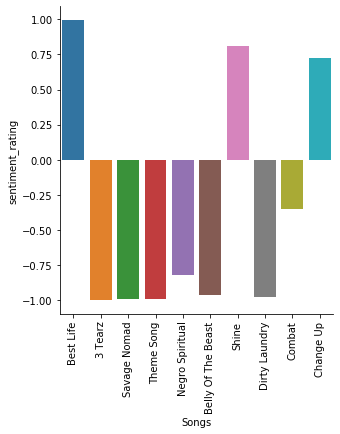

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\Matyas\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


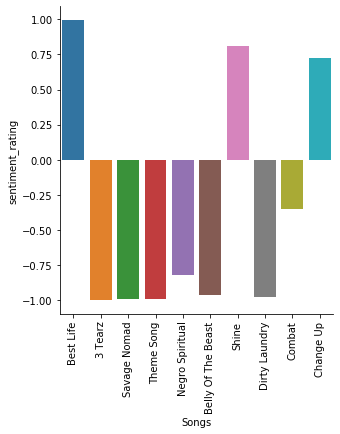

In [79]:
g = sns.factorplot(x='Songs', y='sentiment_rating', data=df_Uknow, kind='bar')
g.set_xticklabels(rotation=90)

C:\Users\Matyas\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


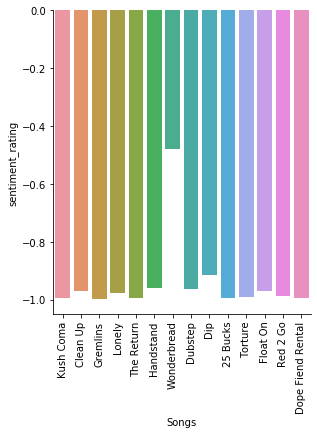

In [80]:
h = sns.factorplot(x='Songs', y='sentiment_rating', data=df_Old, kind='bar')
h.set_xticklabels(rotation=90)

C:\Users\Matyas\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


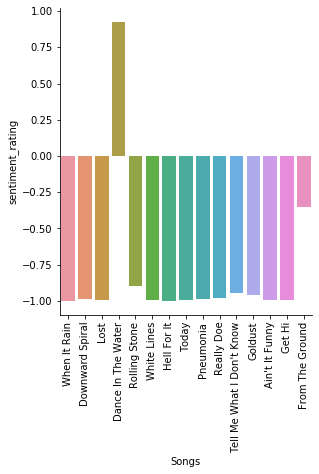

In [81]:
j = sns.factorplot(x='Songs', y='sentiment_rating', data=df_AE, kind='bar')
j.set_xticklabels(rotation=90)